## Testing `Game`

In [1]:
import sys
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath('..'))

from core.engine.main import Game

from core.agents.random import Random

In [4]:
agents = [Random(i) for i in range(4)]
game = Game(agents, 0)
game._initialise_game()

In [5]:
print(game.data['pregame']['deck'])
print(len(game.data['pregame']['deck']))
for i in range(4):
    print(game.data['pregame']['starting_hands'][i],"-", len(game.data['pregame']['starting_hands'][i]),"-", game.data['pregame']['starting_specials'][i])
print(game.data['pregame']['starting_player'])
print(game.data['pregame']['starting_wind'])

[27, 33, 11, 42, 43, 41, 7, 13, 3, 24, 2, 8, 11, 22, 4, 21, 12, 42, 28, 14, 25, 11, 15, 41, 62, 27, 41, 1, 26, 25, 5, 34, 18, 28, 28, 32, 12, 23, 31, 13, 41, 17, 19, 34, 61, 53, 14, 29, 31, 6, 32, 22, 5, 22, 42, 34, 7, 23, 7, 18, 19, 64, 27, 16, 25, 24, 29, 28, 4, 31, 12, 63, 33, 43, 16, 21, 16, 18, 22, 25, 11, 5, 1, 2, 7, 3, 14, 15]
88
[6, 26, 13, 42, 23, 16, 2, 21, 26, 13, 3, 23, 4] - 13 - []
[34, 1, 8, 15, 9, 4, 31, 32, 8, 9, 5, 26, 9, 21] - 14 - []
[17, 9, 19, 29, 6, 12, 6, 8, 18, 43, 29, 15, 14] - 13 - []
[2, 43, 17, 33, 27, 24, 3, 17, 32, 19, 1, 24, 33] - 13 - [54, 51, 52]
1
0


In [4]:
game._main_loop()

{'result': 'draw'}

In [5]:
times = []
stds = []

for _ in range(1000):
        agents = [Random(i) for i in range(4)]
        game = Game(agents, 0)
        game._initialise_game()
        start_time = time.perf_counter()
        game._main_loop()
        end_time = time.perf_counter()
        times.append(end_time - start_time)

times.append(np.mean(times))
times.append(np.std(times))

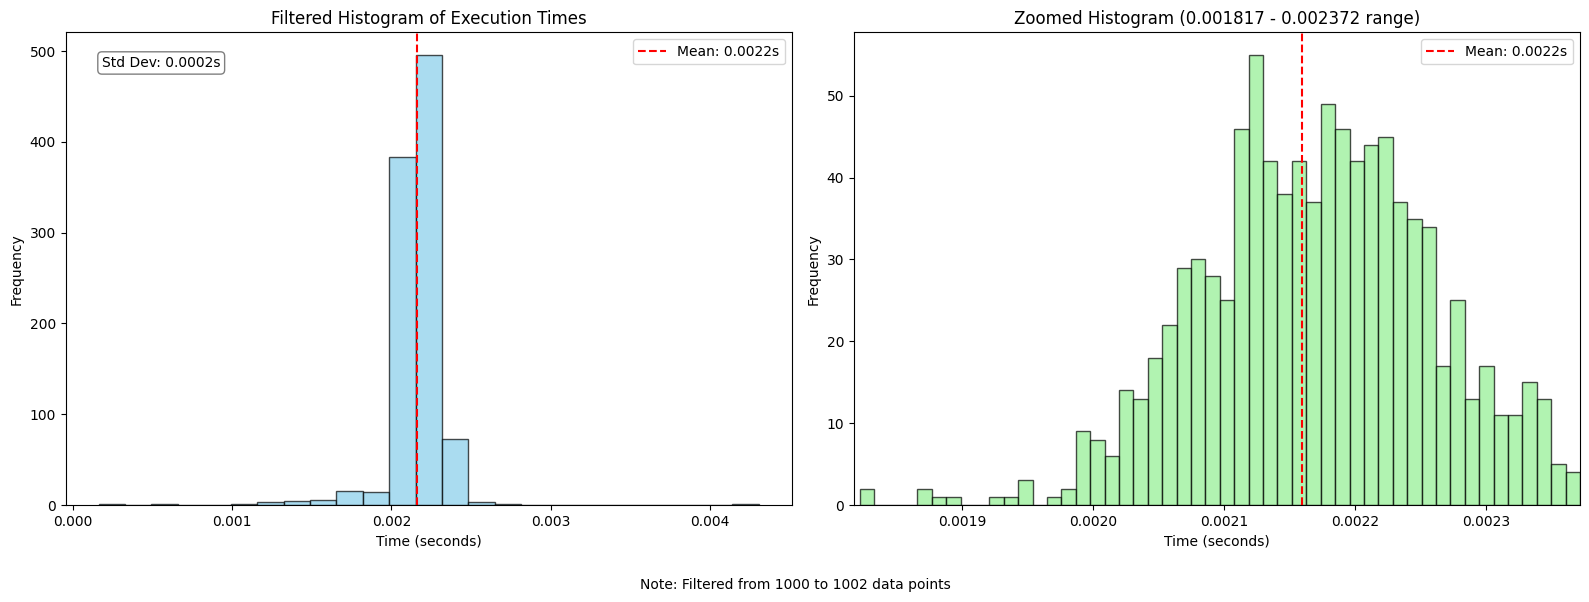

In [6]:
execution_times = times[:-2]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(times, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Filtered Histogram of Execution Times')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Time (seconds)')
ax1.axvline(x=np.mean(times), color='r', linestyle='--', 
            label=f'Mean: {np.mean(times):.4f}s')
ax1.legend()

ax1.text(0.05, 0.95, f'Std Dev: {np.std(times):.4f}s', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

zoom_min = np.percentile(times, 3)
zoom_max = np.percentile(times, 97) 
filtered_times = [t for t in execution_times if zoom_min <= t <= zoom_max]

ax2.hist(filtered_times, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_title(f'Zoomed Histogram ({zoom_min:.6f} - {zoom_max:.6f} range)')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Time (seconds)')
ax2.set_xlim(zoom_min, zoom_max)
ax2.axvline(x=np.mean(times), color='r', linestyle='--', 
            label=f'Mean: {np.mean(times):.4f}s')
ax2.legend()

fig.text(0.5, 0.01, f'Note: Filtered from {len(execution_times)} to {len(times)} data points', 
         ha='center', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

## Testing `Table`

In [7]:
from core.engine.table import Table

In [8]:
times = []
stds = []
max_games = 20

for param in range(1,max_games+1):
    trial_times = []
    for _ in range(5):
        start_time = time.perf_counter()
        agents = [Random(i) for i in range(4)]
        table = Table(agents,param)
        table.play_games()
        end_time = time.perf_counter()
        trial_times.append(end_time - start_time)
    
    times.append(np.mean(trial_times))
    stds.append(np.std(trial_times))

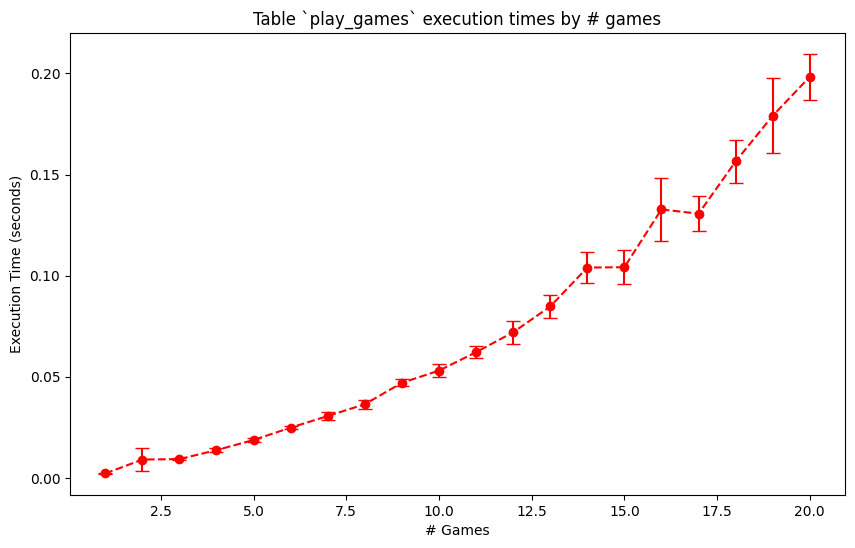

In [9]:
plt.figure(figsize=(10, 6))
plt.errorbar(list(range(1,max_games+1)), times, yerr=stds, fmt='o--', capsize=5, c='red')
plt.xlabel('# Games')
plt.ylabel('Execution Time (seconds)')
plt.title("Table `play_games` execution times by # games")
plt.show()